# Travel Insurance

## 0. Описание

Суть датасета:

Туристическому страховому агенству необходимо принимать решения о выплате или невыплате страховой компенсации застрахованному лицу. Принять это решение могут помочь методы машинного обучения. Дана таблица, в которой описаны 63326 случаев страхования туристов агенством из Сингапура. В столбцах датасета представлена следующая информация о страховых случаях:

1. название агенства
2. тип агенства
3. способ поставки полиса туристического страхования
4. название полиса
5. чистая прибыль после продаж полисов
6. продолжительность страхования
7. место путешествия
8. статус выплаты (совершена или нет)
9. комиссия, полученная агентством по страхованию путешествий
10. пол застрахованного лица
11. возраст застрахованного лица

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Чтение данных


In [2]:
data_raw = pd.read_csv('./data_travel_insurance.csv')
data_raw.head(15)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


##### Размер данных:

In [3]:
N, d = data_raw.shape
print(f"N = {N} - количество значений\nd = {d} - признаков")

N = 63326 - количество значений
d = 11 - признаков


## 2. Визуализациях данных и основные характеристики

### Визуализация данных

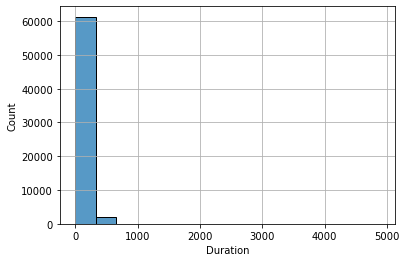

In [4]:
sns.histplot(data_raw['Duration'], bins=15)
plt.grid()

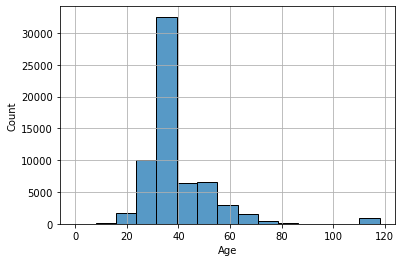

In [6]:
sns.histplot(data_raw['Age'], bins=15)
plt.grid()

По предыдущим двум гистограммам видно, что продолжительность большинства путешествий составляет не более двух недель, а преобладающий возраст всех застрахованных людей - 35-40 лет

Так же в гистограмме с возрастом видно, что некоторые значения принимают подозрительные величины. Посмотрим на эти величины внимательнее:

In [7]:
data_raw[data_raw["Age"] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,NaN,118
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,M,118
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,F,118
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,M,118
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,M,118
...,...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,M,118
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,M,118
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,M,118
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,F,118


Очевидно, что данные с результатом 118 - выбросы. Удалим выбросы из датасета

In [8]:
data_raw.loc[data_raw['Age'] > 100, 'Age'] = np.mean(data_raw["Age"])
rows_to_drop = data_raw[data_raw['Age'] > 100].index
data_raw = data_raw.drop(rows_to_drop)

Посмотрим, как теперь выглядит гистограмма возраста:

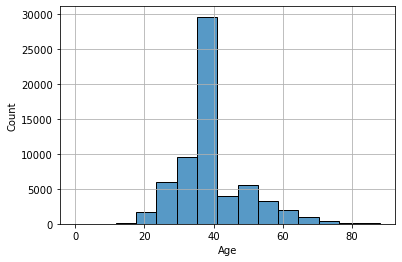

In [10]:
sns.histplot(data_raw['Age'], bins=15)
plt.grid()

По следующей гистограмме видно, что к страховым агенствам обращаются, как мужчины, так и женщины, без явного преимущества в чью-то сторону:

{'F': 8872, 'M': 9347}


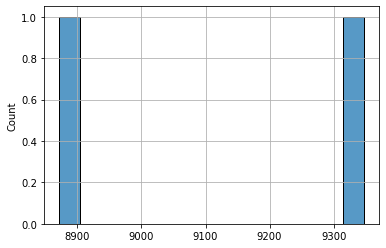

In [11]:
people = {"F": 0, "M": 0}

for i in range(len(data_raw)):
    if data_raw['Gender'][i] == "F":
        people["F"] += 1
    elif data_raw['Gender'][i] == "M":
        people["M"] += 1

sns.histplot(people, bins=15)
plt.grid()
print(people)

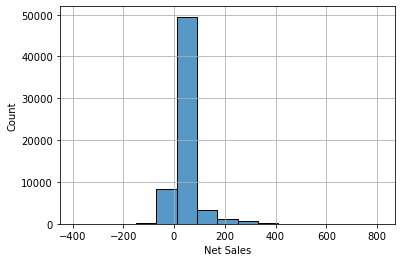

In [12]:
sns.histplot(data_raw['Net Sales'], bins=15)
plt.grid()

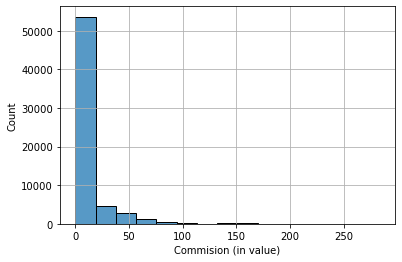

In [13]:
sns.histplot(data_raw['Commision (in value)'], bins=15)
plt.grid()

По последним двум гистограммам можно заметить, что прибыль после
продаж полисов туристического страхования и комиссия туристического агенства похожи на скореллированные величины (за исключением отрициательных значений в гистограмме прибыли). Проверим это, построив матрицу корреляции:

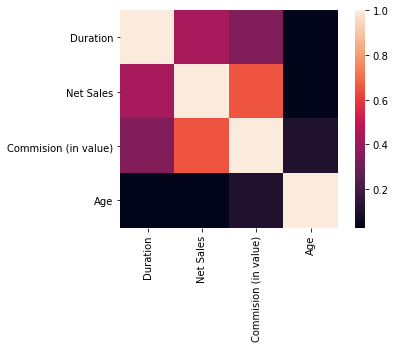

In [15]:
sns.heatmap(data_raw.corr(), square=True)
pass

На следующем графике показано, встречаются ли заявленные полисы только в нескольких агентствах. Судя по графику, распределение равномерное.

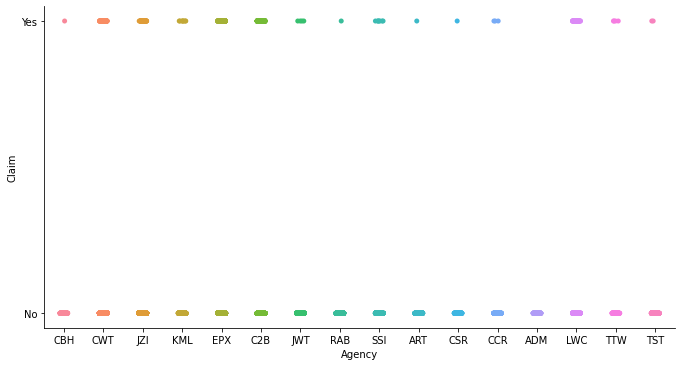

In [16]:
g = sns.catplot(x="Agency", y = "Claim", data=data_raw)
g.fig.set_size_inches(10,5)

## Основные характеристики

In [17]:
data_raw[['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']].describe()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
count,63326,63326,63326,63326,63326,63326,18219
unique,16,2,2,26,2,149,2
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE,M
freq,35119,45869,62219,18630,62399,13255,9347


In [19]:
data_raw[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,38.757500
std,101.791566,48.845637,19.804388,10.019733
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,42.000000
max,4881.000000,810.000000,283.500000,88.000000


После подсчёта основных характеристик видно, что в исходном датасете некоторые значения продолжительности путешествий (Duration) - отрицательные величины. Преобразуем такие записи к средним величинам

(Прибыль тоже имеет иногда отрицательные значения, но это нормально)

In [22]:
data_raw.loc[data_raw["Duration"] < 100, "Duration"] = np.mean(data_raw["Duration"])

# 3. Пропущенные значения

In [24]:
data_raw.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

В графе Пол (Gender) присутствуют пропущенные значения. Заполним их значением NA

In [26]:
data_raw['Gender'].fillna('NA', inplace = True)
data_raw.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64